Mounted at /content/drive
Ativo vencedor por voto preferencial: MNDE


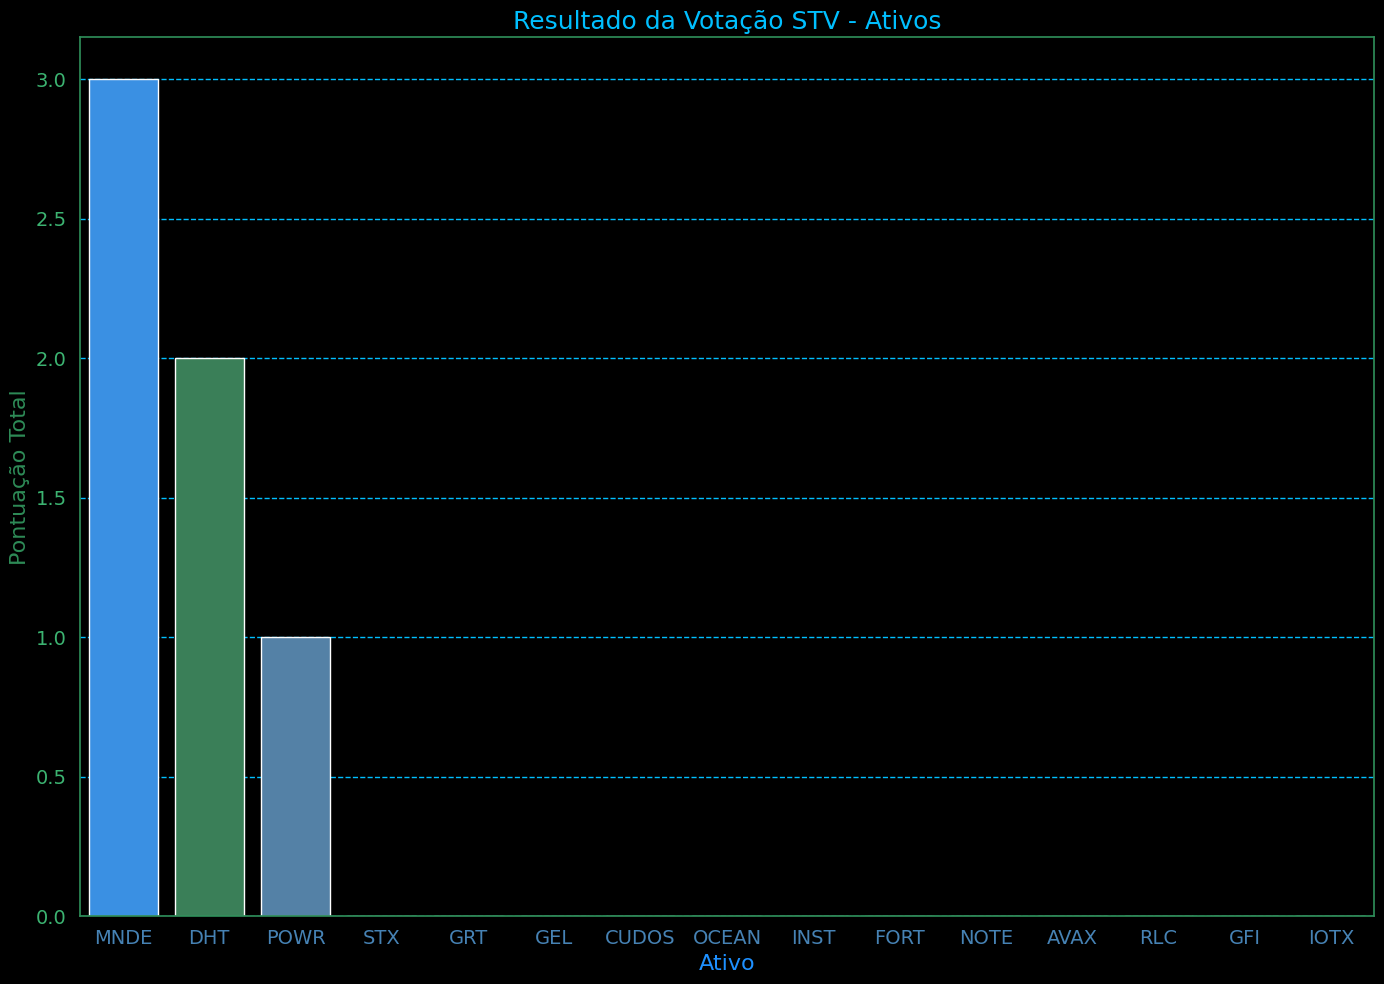

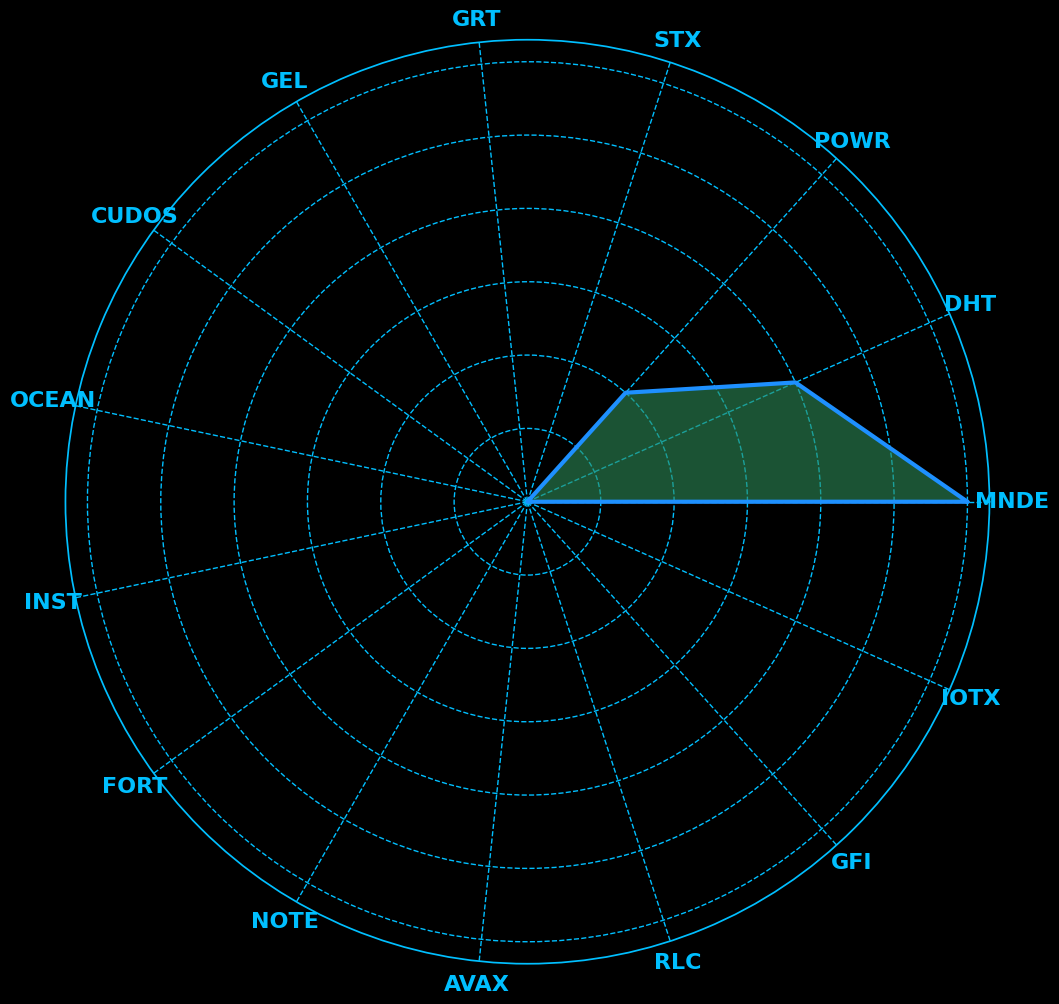

In [1]:
import pandas as pd
import gspread
from google.auth import default
from google.colab import auth
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

def plot_bar_chart(resultados):
    resultados_ordenados = resultados.sort_values(by='Total', ascending=False)

    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid")

    palette = ['#1E90FF', '#2E8B57', '#4682B4', '#3CB371', '#5F9EA0',
               '#66CDAA', '#4169E1', '#008080', '#20B2AA', '#00008B',
               '#556B2F', '#006400', '#000080', '#32CD32', '#8FBC8F']

    ax = sns.barplot(x='Ativo', y='Total', hue='Ativo', data=resultados_ordenados, palette=palette, dodge=False, legend=False)

    ax.set_facecolor('black')
    plt.gcf().set_facecolor('black')
    ax.set_xlabel('Ativo', fontsize=16, color='#1E90FF', fontname='DejaVu Sans')
    ax.set_ylabel('Pontuação Total', fontsize=16, color='#2E8B57', fontname='DejaVu Sans')
    ax.set_title('Resultado da Votação STV - Ativos', fontsize=18, color='#00BFFF', fontname='DejaVu Sans')

    ax.tick_params(axis='x', colors='#4682B4', labelsize=14)
    ax.tick_params(axis='y', colors='#3CB371', labelsize=14)

    ax.spines['top'].set_color('#2E8B57')
    ax.spines['bottom'].set_color('#2E8B57')
    ax.spines['left'].set_color('#2E8B57')
    ax.spines['right'].set_color('#2E8B57')

    ax.grid(True, which='major', axis='y', color='#00BFFF', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/io/barras.png')
    plt.show()

def plot_radar(resultados):
    labels = resultados['Ativo'].values
    stats = resultados['Total'].values

    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    ax.fill(angles, stats, color='#2E8B57', alpha=0.6)
    ax.plot(angles, stats, color='#1E90FF', linewidth=3)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='#00BFFF', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
    ax.set_yticklabels([])
    ax.spines['polar'].set_color('#00BFFF')
    ax.grid(color='#00BFFF', linestyle='--', linewidth=1)
    plt.savefig('/content/drive/My Drive/io/radar.png')
    plt.show()

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

PLANILHA_URL = 'https://docs.google.com/spreadsheets/d/1-M-OlWvXgGR4JuXwTLag2d3vJC0i63ldbf7ZT9aNV50/edit?gid=1466708980#gid=1466708980'

try:
    planilha = gc.open_by_url(PLANILHA_URL)
    aba = planilha.worksheet('votos')
    df = pd.DataFrame(aba.get_all_records())
except Exception as e:
    print(f"Erro ao acessar a planilha: {e}")
    exit()

ativos = ['STX', 'SEI', 'GMX', 'ASTR', 'MNDE', 'CKB', 'SAVM', 'POND', 'CRU', 'ELA', 'MKR', 'STORJ', 'GLM', 'DHT', 'ANKR', 'GRT', 'IOTX', 'POWR', 'GFI', 'RLC', 'AVAX', 'NOTE', 'FORT', 'INST', 'OCEAN', 'CUDOS', 'GEL', 'BOBA']

resultados = pd.DataFrame({'Ativo': ativos, 'Total': 0})

for ativo in ativos:
    for choice in ['1ª escolha', '2ª escolha', '3ª escolha']:
        pontuacao = 4 - int(choice[0])
        resultados.loc[resultados['Ativo'] == ativo, 'Total'] += (
            (df[f'Classifique os 3 ativos que parecem ser as melhores escolhas para investimentos de curto ou curtíssimo prazo. [{ativo}]'] == choice).sum() * pontuacao
        )

resultados = resultados.sort_values(by='Total', ascending=False).head(15)

vencedor = resultados.loc[resultados['Total'].idxmax(), 'Ativo']
print(f"Ativo vencedor por voto preferencial: {vencedor}")

plot_bar_chart(resultados)
plot_radar(resultados)